# <center>Project 1: Scooter Sharing</center>


**Setup** : Imagine that you've been hired by a scooter sharing startup (like Lime or Bird) to investigate whether such a system would make sense to install at Union. (The startup costs are significant -- mosly in the form of new scooters.  The operating costs, however, are quite lowe because they are able to exploit the labor of "contractors" to recharge and repair the scooters)

**System:** The system we'll be modeling, therefore, is the initial distribution and subsequent movement of scooters between locations.  We are of course making several simplifying abstractions: although the scooters are "dockless" we'll assume they usually wind up at any of a number of known campus locations.  Moreover, we'll assume that we can use the same probablistic method to determine whether, at any sampled point in time, a scooter is transferred from one location to another.

**Model:** Aside from the TimeSeries and State objects introduced in Chapters 2-4, we'll also be using a data structure called a *graph*.  Chapter 2 of "Think Complexity" has a nice introduction to graphs, along with the particular package we'll be using, called "networkx".


### Step 1: Initial Graph

- Based on the chicken example in the intro notebook, begin by creating a graph-based model of the scooter system, where the nodes of the graph are locations on campus and the edges between  nodes are connections.  The label/weight of each edge should correspond to the probability (0.0 to 1.0) that at any point, a scooter will be transferred from one node the the next.  Remember that parallel edges won't necessarily be drawn correctly by networkx.

- Create a text cell below and ***describe*** your graph and the choices you made when designing it .

- Create a code cell below and implement your graph.

- Create a code cell below that, and add sufficient testing to confirm your code works

The locations will include the major housing buildings, places for food, and education

In [ ]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from modsim import *

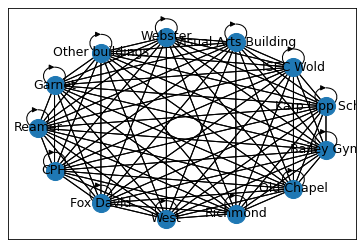

In [ ]:

graph = nx.DiGraph()

locs = ["Reamer", "CPH", "Fox David", "West", "Richmond", "Old Chapel", "Bailey Gym", "Karp Lipp Schaff", "ISEC Wold", "Visual Arts Building", "Webster", "Other buildings", "Garnet"]
Dorms = []
#vals =


#Locations
for loc in locs:
  graph.add_node(loc)

for loc1 in locs:
  for loc2 in locs:
    #if (loc1 != loc2):
      graph.add_edge(loc1, loc2, label = 0.9)



graph_pos = nx.shell_layout(graph)
nx.draw_networkx_nodes(graph,graph_pos)
nx.draw_networkx_labels(graph,graph_pos)
nx.draw_networkx_edges(graph, graph_pos, node_size=10)

plt.show()



***

### Step 2: Initial Modeling

Assume your employer wants to deploy 100 scooters.

Beginning with the chicken code from the intro:

- create a State object, to track the state of your system
- modify step() from the intro, as necessary
- modify run_simulation() as necessary

- create a text cell below and describe and justify your model state variables

- create a code cell below and implement these changes

- create a separate code cell below that to test your model

Streaming output truncated to the last 5000 lines.
('Reamer', 'Garnet')
moving scooter from  Reamer  to  Garnet
CPH Reamer 0.9
('CPH', 'Reamer')
moving scooter from  CPH  to  Reamer
CPH CPH 0.9
('CPH', 'CPH')
CPH Fox David 0.9
('CPH', 'Fox David')
moving scooter from  CPH  to  Fox David
CPH West 0.9
('CPH', 'West')
moving scooter from  CPH  to  West
CPH Richmond 0.9
('CPH', 'Richmond')
moving scooter from  CPH  to  Richmond
CPH Old Chapel 0.9
('CPH', 'Old Chapel')
moving scooter from  CPH  to  Old Chapel
CPH Bailey Gym 0.9
('CPH', 'Bailey Gym')
moving scooter from  CPH  to  Bailey Gym
CPH Karp Lipp Schaff 0.9
('CPH', 'Karp Lipp Schaff')
moving scooter from  CPH  to  Karp Lipp Schaff
CPH ISEC Wold 0.9
('CPH', 'ISEC Wold')
moving scooter from  CPH  to  ISEC Wold
CPH Visual Arts Building 0.9
('CPH', 'Visual Arts Building')
moving scooter from  CPH  to  Visual Arts Building
CPH Webster 0.9
('CPH', 'Webster')
moving scooter from  CPH  to  Webster
CPH Other buildings 0.9
('CPH', 'Other build

"\nCurrently there is something wrong with distributing the scooters correctly.\nWe tried to impliment a random selection so that every scooter was gaurenteed to go somewhere (including it's current location), but couldn't get it to work.\n\n\n"

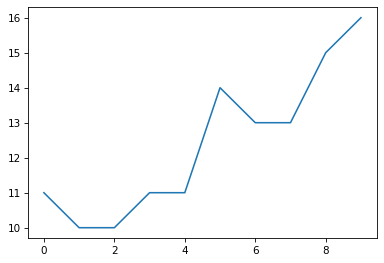

In [ ]:
Locations = ["Reamer", "CPH", "Fox David", "West", "Richmond", "Old Chapel", "Bailey Gym", "Karp Lipp Schaff", "ISEC Wold", "Visual Arts Building", "Webster", "Other buildings", "Garnet"]
InitialValues = {} #create a dictionary of kwargs

#initialize all the location to have 10 scooters

for num in range(len(Locations)):
    InitialValues[Locations[num]] = 3
    if Locations[num] in ['Fox David', 'West', 'Richmond']:
      InitialValues[Locations[num]] = 25
    if Locations[num] == 'CPH':
      InitialValues[Locations[num]] = 50



print(InitialValues)

#this creates a model with four state variables, named thusly, and each with a value of 10graph.add_edge("Other buildings","Other Buildings",label=0.1)
scooterState = State(**InitialValues)


labels = nx.get_edge_attributes(graph,"label")

nodes = labels.keys()
for n in nodes:
    fromloc,toloc = n
    print(fromloc,toloc,labels[n])

def step(state,graph):
   '''we now want this function to determine where a scooter goes  based on the weigh/label of an edge, not hte p1/p2 values from earlier chapters'''

   #get the edges.
   #this returns a dictionary whose keys are pairs (from,to)
   #and whose values are the edge weights/labels
   edgesAndLabels = nx.get_edge_attributes(graph,"label")

    #you can print the dictionary to understand how it works
   for item in edgesAndLabels:  #step through all the edgesgraph.add_edge("Other buildings","Other Buildings",label=0.1)
        fromloc,toloc = item   #unpack the tuple
        weight = edgesAndLabels[item] #find the matching weight
        print(fromloc,toloc,labels[item])
        print(item)
        if (flip(weight)):
            print('moving scooter from ', fromloc, ' to ', toloc)
            #want to replace this with a MoveScooter(state,from,to) method
            if state[fromloc] > 0:
              state[fromloc] -= 1     # < ---- indexing as dictionary instead of dot notation
              state[toloc] += 1
   print(state)
   return

def run_simulation(state, graph, num_steps):
    """Simulate the given number of time steps.
    """
    results = TimeSeries()
    for i in range(num_steps):
        step(state, graph)
        results[i] = state['Reamer']

    plt.plot(results, label='Reamer')


step(scooterState,graph)

run_simulation(scooterState,graph,10)

scooterState

"""
Currently there is something wrong with distributing the scooters correctly.
We tried to impliment a random selection so that every scooter was gaurenteed to go somewhere (including it's current location), but couldn't get it to work.


"""

***

### Step 3:  Answering Questions

Your employers are interested in the following questions:
- Where, every morning, should scooters be deployed after recharging (in order to minimize unhappy customers)
- Where, every evening, should scooters be retrieved in order to be recharged?

In order to thoroughly answer these questions you'll need to do the following:

- improve your model from step 2 above, to keep track of additional information
- run some parameter sweeps, as necessary.
- come up with graphical explanations of your conclusions

Make the changes in code cells below, and add a text block describing the changes you made to your model along the way.  

***

### Step 4: Extending the Model

Now the even more open-ended aspect.  How else could you extend this model?  What other questions could you answer?  What other tools could you use to display your conclusions?  I am looking for you to expand beyond your comfort zone and challenge yourself here.   You may use any external resources you need to do this - just keep track of what you do!

***

### Criteria for Evaluation:

- Quality of Model (25%)
    - is your model reasonable?
    - are your abstractions and simplifications justified?
- Quality of Code (25%)
    - are variables and functions well named?
    - are functions well scoped?
    - is code well documented?
- Quality/Scope of Extended Model (25%)
    - how did you extend the model?
    - did you challenge yourself and learn new things?
- Quality of Analysis and Writeup (25%)
    - how well did you answer the given questions
    - how well did you ask, and answer, new questions with your extended model
    
### Materials to Submit:

- your copy of this notebook
- __with your name on the top!!!__

## Feedback

As you're probably aware, this fall short of expectations.

* You have every node connected to every other node, including itself. Is that reasonable?
* Every edge has a 0.9 weight, which doesn't really make sense and is not grounded in reality.  It's more reasonable to have the sum of all outgoing edges be 1.0 or below.
* the print statements in your code as spammy
* there is no analysis or extension of the model

I would give this a 1 on the 0-3 rubric scale.  Much room for improvement!
